<a href="https://colab.research.google.com/github/jinwoongokRe/AI_basic_study/blob/master/practive6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#달라진점
#1.one-hot encoding
#함수 내부에서 모델 만드는 과정
#flatten을 model 만두는 과정에서 진행

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

1


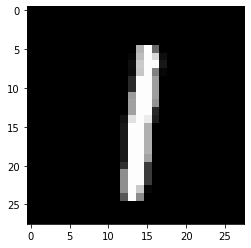

In [5]:
#data확인
import matplotlib.pyplot as plt
%matplotlib inline

index = 40
img = x_train[index]
print(y_train[index])
plt.imshow(img,cmap='gray')

In [6]:
#one-hot encoding해보기
#형변환(astype)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [9]:
#nomarlize
x_train /=255
x_test /=255

In [10]:
#onehotencoding전
y_train[0]

5

In [11]:
#one hot encoding

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
#모델만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten

In [18]:
#좀더 발전방식 
#1 이번엔 함수 안에 가둬서 만들어본다
#2 flatten을 Sequential 내부에서 진행해본다.


In [19]:
def create_model():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(units=64, activation='relu'))
  model.add(Dense(17, 'relu'))
  model.add(Dense(units=10, activation='softmax'))

  return model

In [20]:
#you can alse create compile in about fuc.

In [21]:
model_f = create_model()

In [23]:
model_f.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 17)                1105      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                180       
Total params: 51,525
Trainable params: 51,525
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_f.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [26]:
#모델 학습
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, train_size = 5/6)

In [28]:
#Use validation_data, the argument about fit

In [29]:
history = model_f.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3435 - accuracy: 0.8999 - val_loss: 0.2023 - val_accuracy: 0.9437
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1642 - accuracy: 0.9526 - val_loss: 0.1579 - val_accuracy: 0.9578
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1195 - accuracy: 0.9648 - val_loss: 0.1408 - val_accuracy: 0.9597
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0953 - accuracy: 0.9707 - val_loss: 0.1204 - val_accuracy: 0.9653
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0778 - accuracy: 0.9762 - val_loss: 0.1148 - val_accuracy: 0.9681


In [31]:
#history
#model.fit의 return값
#train과정에서 일어나는 현상들을 기록

In [32]:
vars(history) #vars: 해당 객체의 모듈, 클래스, 인스턴스 값을 넘긴다.

{'_chief_worker_only': None,
 '_supports_tf_logs': False,
 'epoch': [0, 1, 2, 3, 4],
 'history': {'accuracy': [0.8998600244522095,
   0.9526200294494629,
   0.9647600054740906,
   0.970740020275116,
   0.9761599898338318],
  'loss': [0.34350502490997314,
   0.1642405092716217,
   0.11953195929527283,
   0.09526575356721878,
   0.07783807814121246],
  'val_accuracy': [0.9437000155448914,
   0.9577999711036682,
   0.9596999883651733,
   0.9653000235557556,
   0.9681000113487244],
  'val_loss': [0.2023194283246994,
   0.15789002180099487,
   0.1408066749572754,
   0.12040523439645767,
   0.1148323118686676]},
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fb457837668>,
 'params': {'epochs': 5, 'steps': 1563, 'verbose': 1},
 'validation_data': None}

In [33]:
#add 메서드의 단점(stack)극복
model_f = create_model()
model_f.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_f.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3340 - accuracy: 0.9049 - val_loss: 0.1932 - val_accuracy: 0.9427
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1494 - accuracy: 0.9556 - val_loss: 0.1402 - val_accuracy: 0.9603
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1077 - accuracy: 0.9682 - val_loss: 0.1287 - val_accuracy: 0.9633
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0856 - accuracy: 0.9746 - val_loss: 0.1197 - val_accuracy: 0.9660
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0701 - accuracy: 0.9784 - val_loss: 0.1146 - val_accuracy: 0.9683


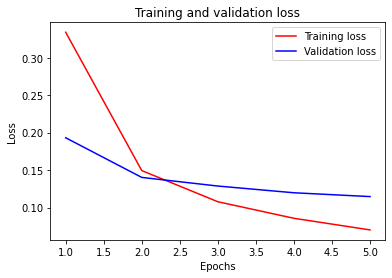

In [34]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

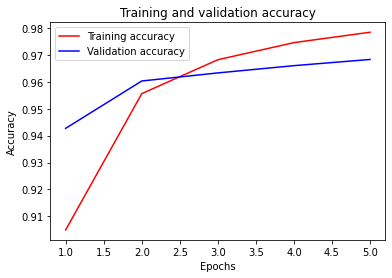

In [36]:
#accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [37]:
loss_and_metrics = model_f.evaluate(x_test, y_test, verbose=0)

In [39]:
print('test_loss: ' + str(loss_and_metrics[0]))
print('test_accuracy: ' + str(loss_and_metrics[1]*100) + '%')

test_loss: 0.09769376367330551
test_accuracy: 97.04999923706055%


In [40]:
#predict
#y와의 비교없이 forward propagation만 하는 것
#x만 넣는다.
#실제 device에서 진행


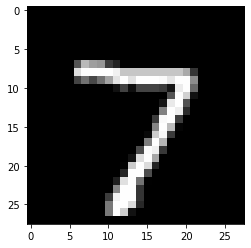

In [42]:
plt.imshow(x_test[0], cmap='gray')

In [43]:
model_f.predict(x_test[0].reshape(1,28,28))

array([[5.0246007e-07, 7.8324143e-07, 1.2212558e-04, 4.5286576e-04,
        2.1508493e-09, 5.5268919e-07, 1.6184191e-10, 9.9928892e-01,
        4.4001176e-06, 1.2987573e-04]], dtype=float32)

In [44]:
import numpy as np

In [45]:
x_test[0].shape

(28, 28)

In [46]:
np.expand_dims(x_test[0], axis=0).shape

(1, 28, 28)

In [47]:
a= model_f.predict(np.expand_dims(x_test[0], axis=0))
a

array([[5.0246007e-07, 7.8324143e-07, 1.2212558e-04, 4.5286576e-04,
        2.1508493e-09, 5.5268919e-07, 1.6184191e-10, 9.9928892e-01,
        4.4001176e-06, 1.2987573e-04]], dtype=float32)

In [48]:
np.sum(a)

1.0

In [49]:
np.max(a)

0.9992889

In [50]:
np.argmax(a) #최대값을 가지는 곳(정답이라고 예측한 곳)의 index 출력

7